In [1]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import re
import csv

In [11]:
# Collect first page of list
# list_of_pages = requests.get("https://www.immobilienscout24.de/Suche/S-T/Wohnung-Miete/Fahrzeitsuche/Frankfurt_20am_20Main/-/-95993/2244895/-/1276007004/60?enteredFrom=result_list")

# Create a BeautifulSoup object
# soup_for_list = BeautifulSoup(list_of_pages.text, 'html.parser')


result = []
header = ["type_of_house", "living_space", "number_of_rooms", "rent", "construction_year", "street", "zipcode", "region", "tag"]
result.append(header)

def page_spider():
    for i in range(0, 143):
        link = "https://www.immobilienscout24.de/Suche/S-"
        link += str(i)
        link += "/Wohnung-Miete/Fahrzeitsuche/Frankfurt_20am_20Main/-/-95993/2244895/-/1276007004/60?enteredFrom=result_list"
        page = requests.get(link)
        soup_for_list = BeautifulSoup(page.text, 'html.parser')
        list_spider(soup_for_list)

def list_spider(soup_for_list):
    lst = []
    for paragraph in soup_for_list.find_all('a'):
        if '/expose/' in str(paragraph.get("href")):
            lst.append(paragraph.get('href'))

    lst = list(set(lst))

    for item in lst:
        page = requests.get("https://www.immobilienscout24.de"+item)
        soup = BeautifulSoup(page.text, 'html.parser')

        try:
            type_of_house = soup.find(class_= 'is24qa-typ grid-item three-fifths').text.strip()
        except:
            type_of_house = ''
        try:
            living_space = soup.find(class_='is24qa-wohnflaeche-ca').text.strip()
        except:
            living_space = ''
        try:
            number_of_rooms = int(soup.find(class_='is24qa-zimmer grid-item three-fifths').text.strip())
        except:
            number_of_rooms = ''
        try:
            rent = soup.find(class_='is24qa-gesamtmiete').text.strip()
        except:
            rent = ''
        try:
            construction_year = soup.find(class_='is24qa-baujahr').text.strip()
        except:
            construction_year = ''
        try:
            street = soup.find(class_='block font-nowrap print-hide').text.strip().rstrip(',')
        except:
            street = ''
        try:
            zip_region = soup.find(class_='zip-region-and-country').text.strip()
            zipcode = re.sub('[^\d]+', '', zip_region).strip()
            region = re.sub('[\d]+', '', zip_region).strip()
        except:
            zipcode = ''
            region = ''

        living_space = int(re.sub('[^\d,]+','',living_space).split(",")[0])
        rent = int(re.sub('[^\d,]+', '', rent).split(",")[0])

        new_list = [type_of_house, living_space, number_of_rooms, rent, construction_year, street, zipcode, region, item]
        result.append(new_list)

    with open("data.csv", "w", newline="") as f:
        writer = csv.writer(f)
        writer = writer.writerows(result)

page_spider()

In [ ]:
import requests 
import urllib.parse
import pandas as pd 
from time import sleep

df = pd.read_csv("data.csv", nrows = 2450)
URL1 = 'https://api.opencagedata.com/geocode/v1/json?q='
URL3 = '&key=71b9900ab09246f99610ef8cfb212c2e&language=en&pretty=1'
lst_lat = []
lst_lng = []

for index, row in df.iterrows():
    query = str(row['street']) +  ", " + str(row['zipcode']) + ", " + str(row['region'])
    URL2 = urllib.parse.quote(query)
    r = requests.get(URL1+URL2+URL3)
    data = r.json()
    try: 
        latitude = data['results'][0]['geometry']['lat']
        longitude = data['results'][0]['geometry']['lng']
    except: 
        latitude = ''
        longitude = ''
    lst_lat.append(latitude)
    lst_lng.append(longitude)
    sleep(1)
df["latitude"] = lst_lat
df["longitude"] = lst_lat
df


In [5]:
df.to_csv("new_data1.csv", sep='\t')

In [3]:
import pandas as pd 
df = pd.read_csv("new_data1.csv", sep='\t', nrows = 2450)
df

,Unnamed: 0,type_of_house,living_space,number_of_rooms,rent,construction_year,street,zipcode,region,tag,latitude,longitude
0,0,Etagenwohnung,62,2.0,1350,2011,Kurfürstenstr. 14a,60486,"Frankfurt am Main, Bockenheim",/expose/61973555,50.122193,50.122193
1,1,Etagenwohnung,45,1.0,205,unbekannt,Pfingstbrunnenstraße 40,60486,"Frankfurt, Bockenheim",/expose/83854266,50.117690,50.117690
2,2,Dachgeschoss,80,3.0,1550,1880,Kurfürstenstr. 49,60486,"Frankfurt am Main, Bockenheim",/expose/114237680,50.119713,50.119713
3,3,NaN,60,2.0,1040,unbekannt,Fritzlarer Strasse 9,60487,"Frankfurt a.M. - Bockenheim, Frankfurt am Main",/expose/114435895,50.115520,50.115520
4,4,Etagenwohnung,81,3.0,1445,2005,Voltastraße 43,60486,"Frankfurt am Main, Bockenheim",/expose/114546550,50.116796,50.116796
5,5,Dachgeschoss,20,1.0,440,1965,NaN,60486,"Frankfurt, Bockenheim",/expose/82913104,50.122361,50.122361
6,6,Etagenwohnung,83,2.0,1445,2005,Voltastraße 41,60486,"Frankfurt am Main, Bockenheim",/expose/113486807,50.116794,50.116794
7,7,Etagenwohnung,100,2.0,2080,2010,Leipziger Straße 00,60486,"Frankfurt-Bockenheim, Frankfurt am Main",/expose/113395106,50.122660,50.122660
8,8,NaN,60,2.0,1040,unbekannt,Fritzlarer Strasse 9,60487,"Frankfurt a.M. - Bockenheim, Frankfurt am Main",/expose/114435845,50.115520,50.115520
9,9,Maisonette,115,3.0,1950,2009,Ohmstraße 55,60486,"Frankfurt am Main, Bockenheim",/expose/114348636,50.117494,50.117494


In [4]:
new_df = df.rename({'Unnamed: 0': 'index'}, axis=1) 
new_df = new_df.replace(to_replace = "unbekannt", value ="")
new_df

,index,type_of_house,living_space,number_of_rooms,rent,construction_year,street,zipcode,region,tag,latitude,longitude
0,0,Etagenwohnung,62,2.0,1350,2011,Kurfürstenstr. 14a,60486,"Frankfurt am Main, Bockenheim",/expose/61973555,50.122193,50.122193
1,1,Etagenwohnung,45,1.0,205,,Pfingstbrunnenstraße 40,60486,"Frankfurt, Bockenheim",/expose/83854266,50.117690,50.117690
2,2,Dachgeschoss,80,3.0,1550,1880,Kurfürstenstr. 49,60486,"Frankfurt am Main, Bockenheim",/expose/114237680,50.119713,50.119713
3,3,NaN,60,2.0,1040,,Fritzlarer Strasse 9,60487,"Frankfurt a.M. - Bockenheim, Frankfurt am Main",/expose/114435895,50.115520,50.115520
4,4,Etagenwohnung,81,3.0,1445,2005,Voltastraße 43,60486,"Frankfurt am Main, Bockenheim",/expose/114546550,50.116796,50.116796
5,5,Dachgeschoss,20,1.0,440,1965,NaN,60486,"Frankfurt, Bockenheim",/expose/82913104,50.122361,50.122361
6,6,Etagenwohnung,83,2.0,1445,2005,Voltastraße 41,60486,"Frankfurt am Main, Bockenheim",/expose/113486807,50.116794,50.116794
7,7,Etagenwohnung,100,2.0,2080,2010,Leipziger Straße 00,60486,"Frankfurt-Bockenheim, Frankfurt am Main",/expose/113395106,50.122660,50.122660
8,8,NaN,60,2.0,1040,,Fritzlarer Strasse 9,60487,"Frankfurt a.M. - Bockenheim, Frankfurt am Main",/expose/114435845,50.115520,50.115520
9,9,Maisonette,115,3.0,1950,2009,Ohmstraße 55,60486,"Frankfurt am Main, Bockenheim",/expose/114348636,50.117494,50.117494


In [5]:
new_df.reset_index()
new_df
new_df.to_csv("data2.csv", sep=',',index=False)

In [6]:
df.to_csv("data1.csv", sep='\t', encoding='utf-8')

In [7]:
# comment

In [8]:
# wc -l data.csv

In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


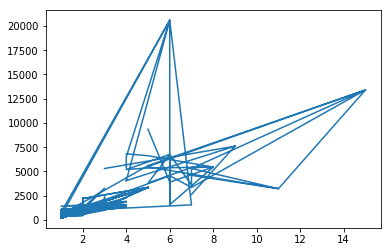

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

#visualize data
axis_x = df["number_of_rooms"]
axis_y = df["rent"]
plt.plot(axis_x, axis_y)
plt.show()


In [11]:
# make a list of missing value
missing_value = ["NaN", "unbekannt", ""]
df = pd.read_csv("data2.csv", na_values = missing_value)
df

,index,type_of_house,living_space,number_of_rooms,rent,construction_year,street,zipcode,region,tag,latitude,longitude
0,0,Etagenwohnung,62,2.0,1350,2011.0,Kurfürstenstr. 14a,60486,"Frankfurt am Main, Bockenheim",/expose/61973555,50.122193,50.122193
1,1,Etagenwohnung,45,1.0,205,NaN,Pfingstbrunnenstraße 40,60486,"Frankfurt, Bockenheim",/expose/83854266,50.117690,50.117690
2,2,Dachgeschoss,80,3.0,1550,1880.0,Kurfürstenstr. 49,60486,"Frankfurt am Main, Bockenheim",/expose/114237680,50.119713,50.119713
3,3,NaN,60,2.0,1040,NaN,Fritzlarer Strasse 9,60487,"Frankfurt a.M. - Bockenheim, Frankfurt am Main",/expose/114435895,50.115520,50.115520
4,4,Etagenwohnung,81,3.0,1445,2005.0,Voltastraße 43,60486,"Frankfurt am Main, Bockenheim",/expose/114546550,50.116796,50.116796
5,5,Dachgeschoss,20,1.0,440,1965.0,NaN,60486,"Frankfurt, Bockenheim",/expose/82913104,50.122361,50.122361
6,6,Etagenwohnung,83,2.0,1445,2005.0,Voltastraße 41,60486,"Frankfurt am Main, Bockenheim",/expose/113486807,50.116794,50.116794
7,7,Etagenwohnung,100,2.0,2080,2010.0,Leipziger Straße 00,60486,"Frankfurt-Bockenheim, Frankfurt am Main",/expose/113395106,50.122660,50.122660
8,8,NaN,60,2.0,1040,NaN,Fritzlarer Strasse 9,60487,"Frankfurt a.M. - Bockenheim, Frankfurt am Main",/expose/114435845,50.115520,50.115520
9,9,Maisonette,115,3.0,1950,2009.0,Ohmstraße 55,60486,"Frankfurt am Main, Bockenheim",/expose/114348636,50.117494,50.117494


In [12]:
# replace NaN with Median
median = df['number_of_rooms'].median()
df['number_of_rooms'].fillna(median, inplace=True)
df

,index,type_of_house,living_space,number_of_rooms,rent,construction_year,street,zipcode,region,tag,latitude,longitude
0,0,Etagenwohnung,62,2.0,1350,2011.0,Kurfürstenstr. 14a,60486,"Frankfurt am Main, Bockenheim",/expose/61973555,50.122193,50.122193
1,1,Etagenwohnung,45,1.0,205,NaN,Pfingstbrunnenstraße 40,60486,"Frankfurt, Bockenheim",/expose/83854266,50.117690,50.117690
2,2,Dachgeschoss,80,3.0,1550,1880.0,Kurfürstenstr. 49,60486,"Frankfurt am Main, Bockenheim",/expose/114237680,50.119713,50.119713
3,3,NaN,60,2.0,1040,NaN,Fritzlarer Strasse 9,60487,"Frankfurt a.M. - Bockenheim, Frankfurt am Main",/expose/114435895,50.115520,50.115520
4,4,Etagenwohnung,81,3.0,1445,2005.0,Voltastraße 43,60486,"Frankfurt am Main, Bockenheim",/expose/114546550,50.116796,50.116796
5,5,Dachgeschoss,20,1.0,440,1965.0,NaN,60486,"Frankfurt, Bockenheim",/expose/82913104,50.122361,50.122361
6,6,Etagenwohnung,83,2.0,1445,2005.0,Voltastraße 41,60486,"Frankfurt am Main, Bockenheim",/expose/113486807,50.116794,50.116794
7,7,Etagenwohnung,100,2.0,2080,2010.0,Leipziger Straße 00,60486,"Frankfurt-Bockenheim, Frankfurt am Main",/expose/113395106,50.122660,50.122660
8,8,NaN,60,2.0,1040,NaN,Fritzlarer Strasse 9,60487,"Frankfurt a.M. - Bockenheim, Frankfurt am Main",/expose/114435845,50.115520,50.115520
9,9,Maisonette,115,3.0,1950,2009.0,Ohmstraße 55,60486,"Frankfurt am Main, Bockenheim",/expose/114348636,50.117494,50.117494


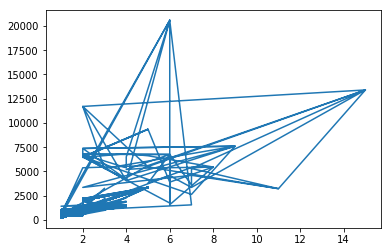

In [13]:
axis_x = df["number_of_rooms"]
axis_y = df["rent"]
plt.plot(axis_x, axis_y)
plt.show()

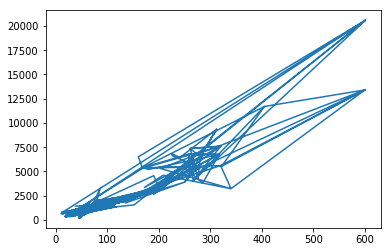

In [14]:
axis_x = df["living_space"]
axis_y = df["rent"]
plt.plot(axis_x, axis_y)
plt.show()

In [21]:
model = sklearn.linear_model.LinearRegression()
axis_x = np.c_[df['number_of_rooms']]
axis_y = np.c_[df['rent']]
model.fit(axis_x,axis_y)
new_x1 = [[1]]
new_x2 = [[2]]
new_x3 = [[3]]
new_x4 = [[4]]
new_x5 = [[5]]
print("One room: ", model.predict(new_x1))
print("Two rooms: ", model.predict(new_x2))
print("Three rooms: ", model.predict(new_x3))
print("Four rooms: ", model.predict(new_x4))
print("Five rooms: ", model.predict(new_x5))

One room:  [[544.59134391]]
Two rooms:  [[1240.41340946]]
Three rooms:  [[1936.235475]]
Four rooms:  [[2632.05754054]]
Five rooms:  [[3327.87960609]]


In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(axis_x,axis_y.ravel())
new_x1 = [[1]]
new_x2 = [[2]]
new_x3 = [[3]]
new_x4 = [[4]]
new_x5 = [[5]]
print("One room: ", model.predict(new_x1))
print("Two rooms: ", model.predict(new_x2))
print("Three rooms: ", model.predict(new_x3))
print("Four rooms: ", model.predict(new_x4))
print("Five rooms: ", model.predict(new_x5))

One room:  [525]
Two rooms:  [1040]
Three rooms:  [1030]
Four rooms:  [1480]
Five rooms:  [3350]
